<a href="https://colab.research.google.com/github/heejjj/Health_Bio_AI/blob/bio_colab/regeression_calssification_230323_2nd_hand_car_predict_0413_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#중고차 예측 문제 
#100,000 UK Used Car Data set
#100,000 scraped used car listings, cleaned and split into car make.
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/code
#competition이 아니라 데이터 다운로드 해서 활용

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_vw = pd.read_csv('/content/drive/MyDrive/data/used_car_prediction/vw.csv')
print(data_vw.shape)

(15157, 9)


In [4]:
data_vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [5]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [9]:
sns.countplot(data_vw['transmission'])

ValueError: ignored

 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Caddy Maxi         0.000264
 Fox                0.000264
Name: model, dtype: float64


<Axes: xlabel='count', ylabel='model'>

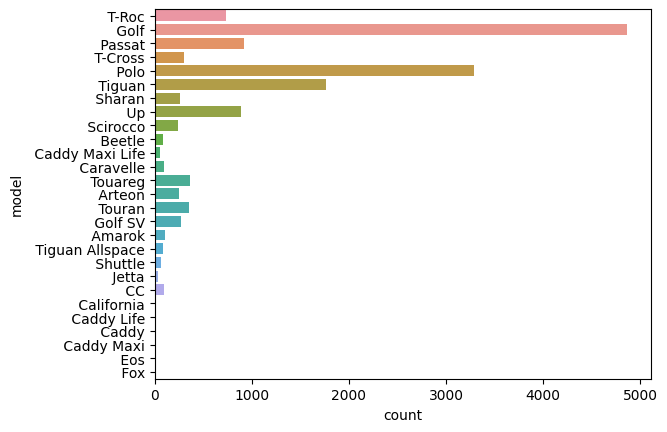

In [10]:
print(data_vw['model'].value_counts() / len(data_vw)) #정규화 작업.
sns.countplot(y = data_vw["model"])

In [11]:
sns.countplot(data_vw['fuelType'])

ValueError: ignored

<Axes: xlabel='year', ylabel='price'>

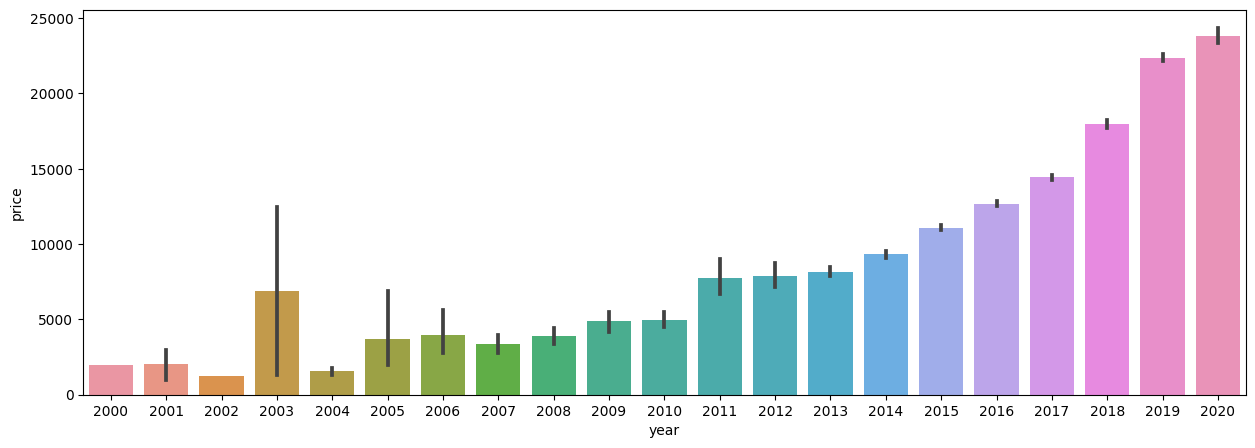

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x = data_vw['year'], y = data_vw['price'])

<Axes: xlabel='mileage', ylabel='price'>

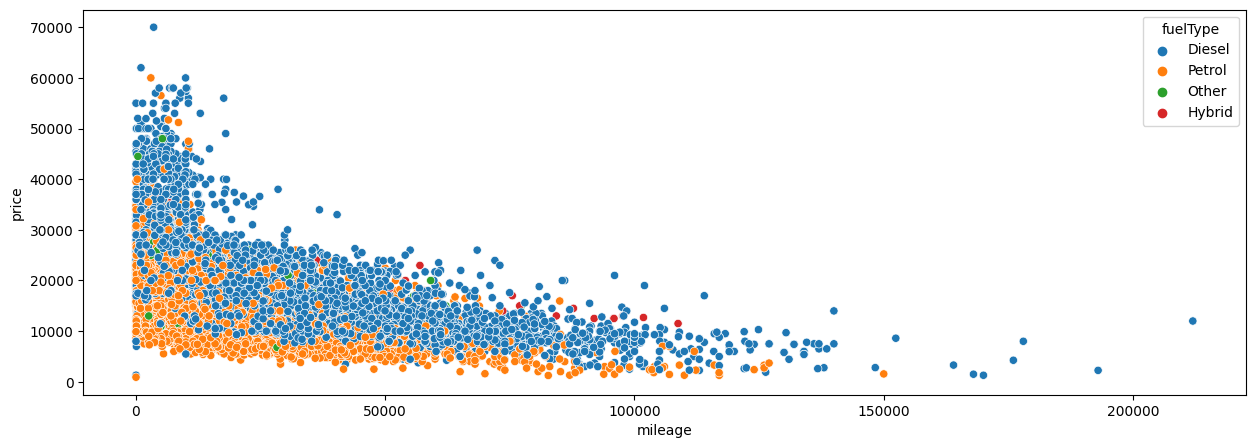

In [14]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(x = data_vw["mileage"], y = data_vw["price"], hue = data_vw["fuelType"])

<Axes: xlabel='mileage', ylabel='price'>

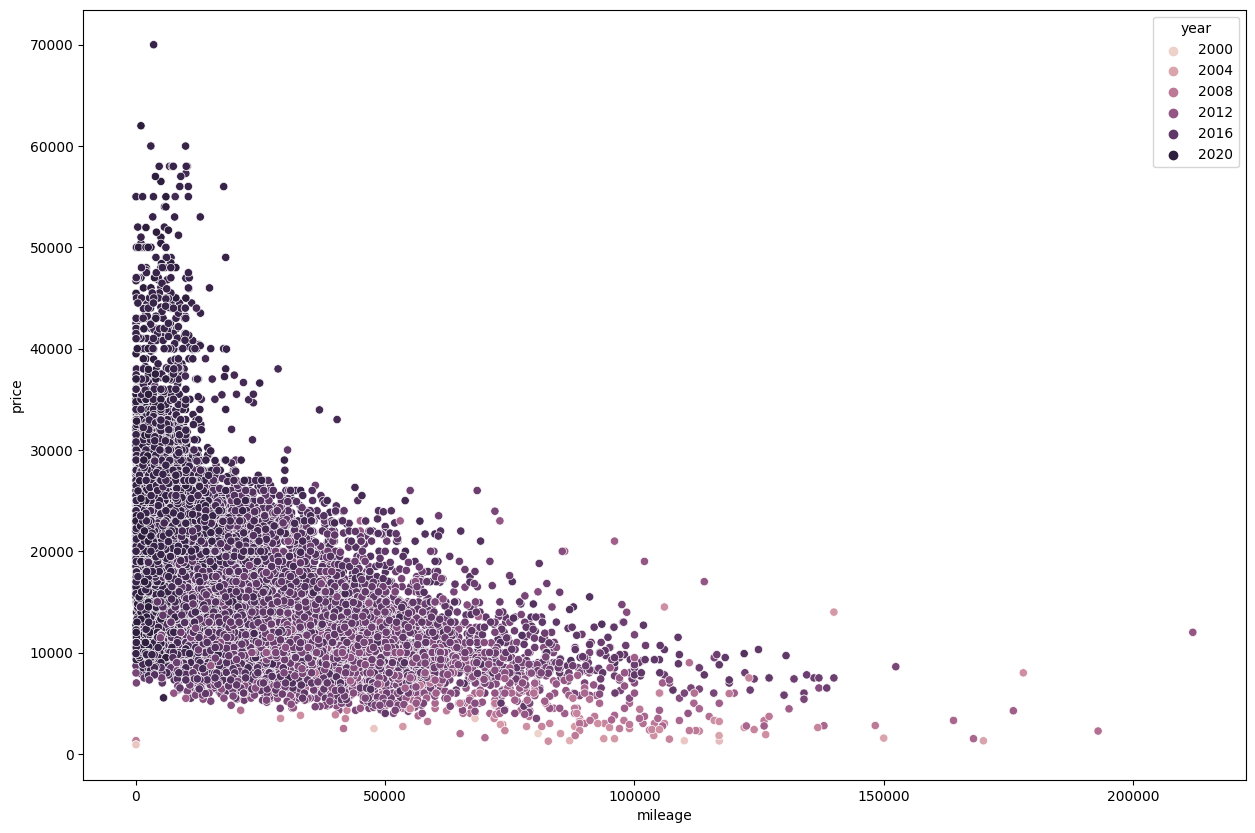

In [15]:
plt.figure(figsize=(15,10),facecolor='w') #facecolor : 배경색
sns.scatterplot(x= data_vw["mileage"], y = data_vw["price"], hue = data_vw["year"])

<Axes: xlabel='mileage', ylabel='price'>

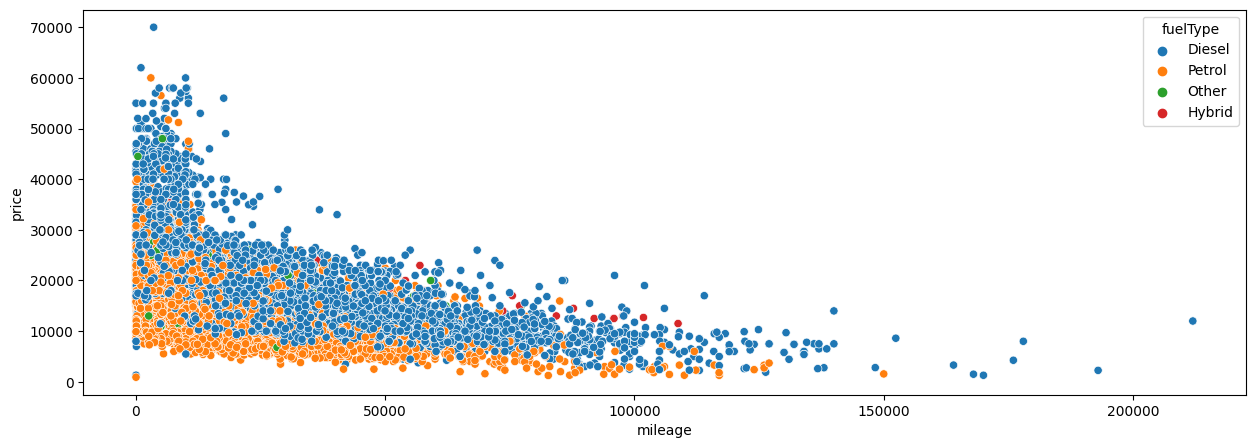

In [16]:
plt.figure(figsize=(15,5),facecolor='w') 
sns.scatterplot(x = data_vw["mileage"], y = data_vw["price"], hue = data_vw["fuelType"])

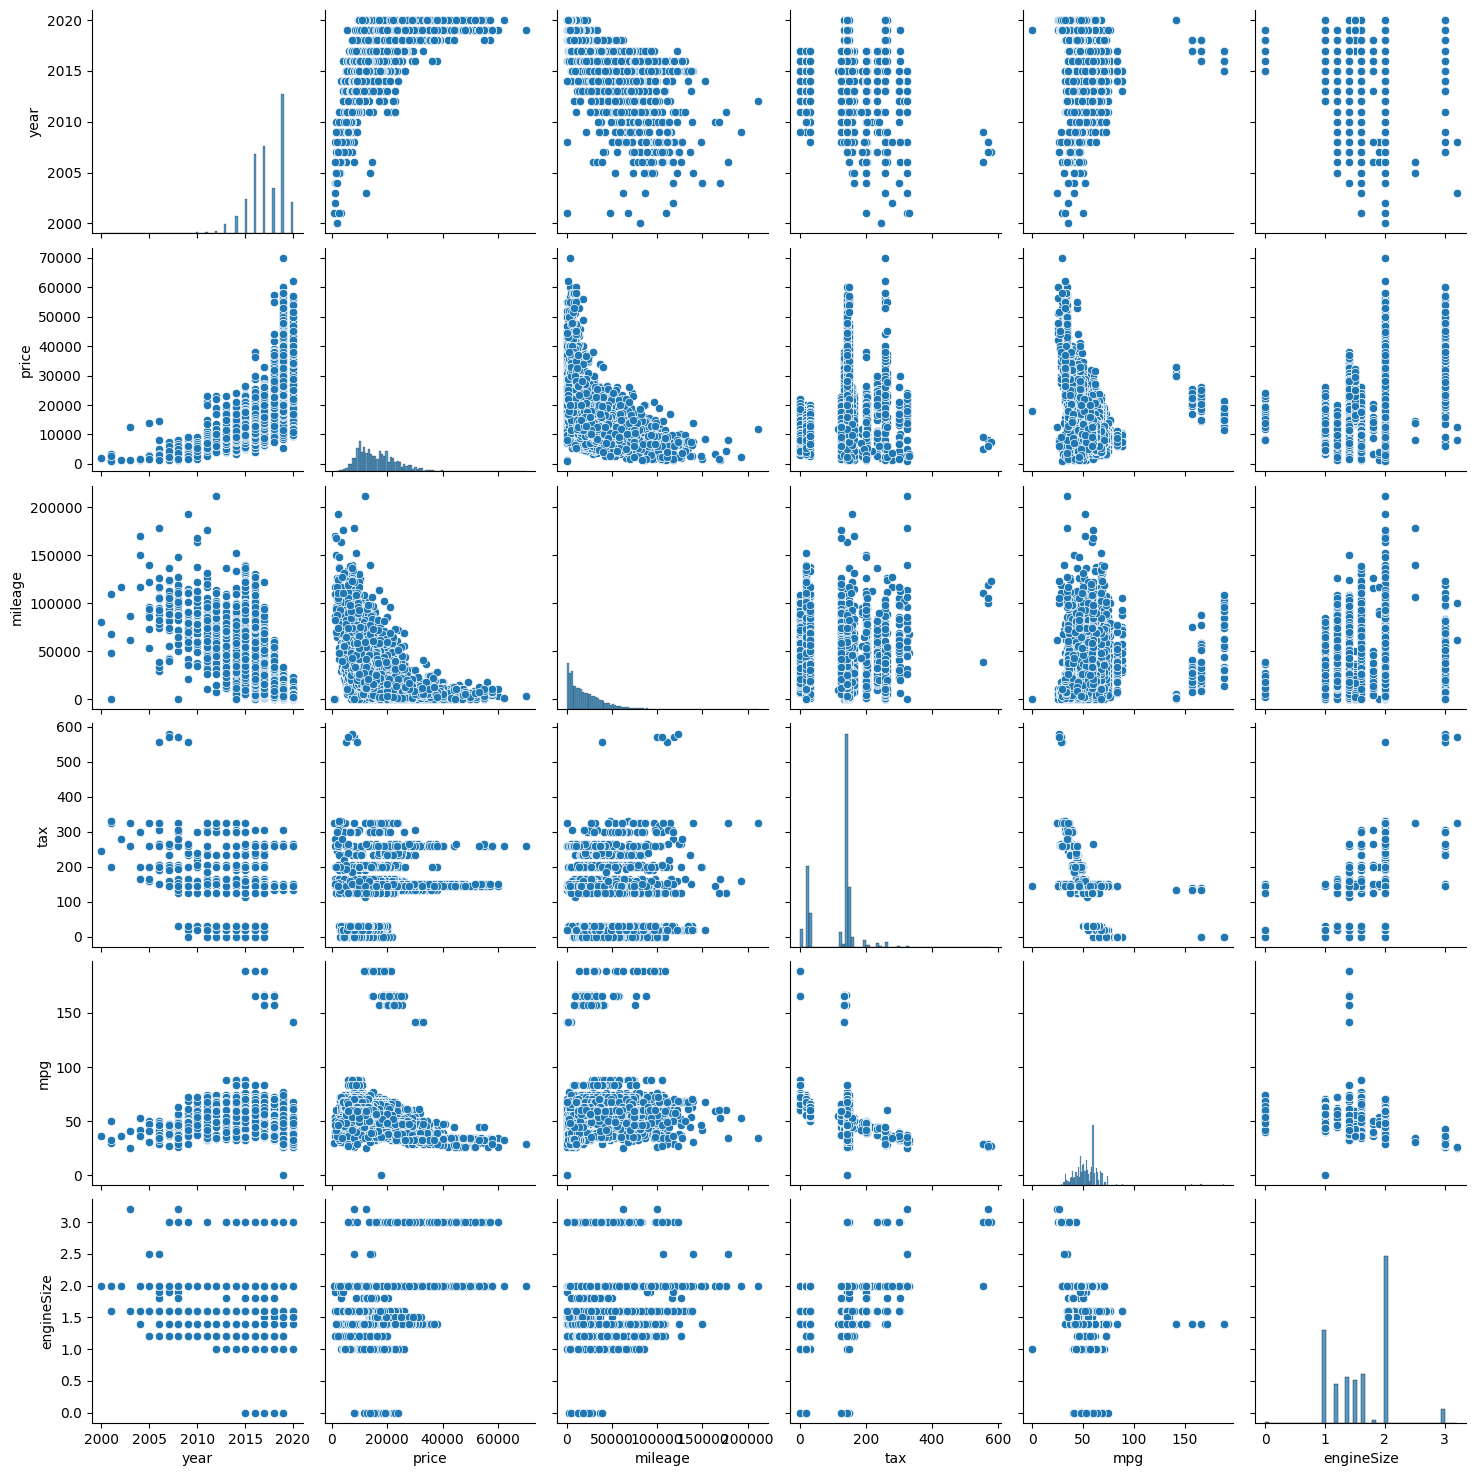

In [17]:
#pairplot 변수들 간의 상관관계, scatter plot을 그림
sns.pairplot(data_vw)

In [18]:
data_vw["age_of_car"] = 2020 - data_vw["year"] #얼마나 오래되었는지?
data_vw = data_vw.drop(columns = ["year"])
data_vw.sample(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
10622,Tiguan,11541,Manual,57240,Diesel,125,56.5,2.0,4
8430,Polo,13500,Manual,1130,Petrol,145,52.3,1.0,1
3799,Golf,14390,Manual,13900,Petrol,125,44.1,1.4,4
8133,Polo,12490,Semi-Auto,13300,Petrol,150,60.1,1.2,3
4887,Golf,10500,Manual,40142,Diesel,0,74.3,1.6,4
212,T-Roc,18500,Manual,7102,Diesel,145,50.4,1.6,1
12577,Up,9990,Manual,2000,Petrol,150,54.3,1.0,1
10506,Tiguan,27999,Manual,13448,Diesel,145,42.2,2.0,1
13846,Touareg,19400,Automatic,38249,Diesel,240,42.8,3.0,5
13725,Touareg,35990,Automatic,25,Diesel,145,34.9,3.0,1


In [21]:
data_vw.head()

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1


## Pre-processign for Modeling

In [19]:
#one-hot-encoding
data_vw_expanded = pd.get_dummies(data_vw) 
data_vw_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
std = StandardScaler() #값이 중구난방이기 때문에 정규화를 해줌.
#Scaler종류
#normalizer 각 변수의 값을 원점으로 부터 1만큼 떨어져 있는 범위 내로 변환(빠른 학습 가능, 과대적합 확률 낮춤)
#log scaler
#min_max scaler(정규분포가 bell-shape이 아니거나, 표준편차가 작을떄 효과적)
#robust sclar(이상치가 심할떄 쓰임, 모든 feature가 같은ㄴ 크기를 갖는다는 점이 standard와 유사, 평균과 분산이 아닌 중위수(median)과 IQR(사분위수)를 사용함
#standard scaler에 비해 이상치의 영향이 적어짐

data_vw_expanded_std = std.fit_transform(data_vw_expanded) #transform으로 적용을 해줌.
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns) #dataFrame화 하는게->행,열 접근 용이하기 위해서.
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()

(15157, 40)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_vw_expanded_std.drop(columns = ['price']), data_vw_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11367, 39)
(3790, 39)
(11367, 1)
(3790, 1)


In [23]:
from sklearn.feature_selection import SelectKBest, f_regression

#f분포:
#분산을 줄이는 방법으로 
#f통계량이 높으면 클래스별 평균이 서로 
#컬럼을 지워야하는 경우에는 쓰면 안됨
#당뇨병 당화혈색소 중요 

"""
SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다
f_regression 참고 : (https://woolulu.tistory.com/63)
Linear model for testing the individual effect of each of many regressors. 
This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure."""

'\nSelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다\nf_regression 참고 : (https://woolulu.tistory.com/63)\nLinear model for testing the individual effect of each of many regressors. \nThis is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.'

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

<Axes: >

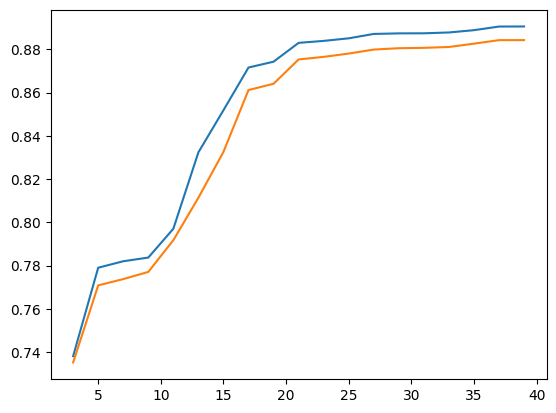

In [24]:

column_names = data_vw_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

#selectKbest -> 컬럼이 너무 많을때 씀 
#f-regression을 단독으로 쓰기 어려운 이유: 분산을 찾는 것(그러나 평균으로 갈지는 모름) -> 비교지 어떤게 맞는건지 찾는건 아님
#-> 평균을 보기 위해서 regression과 함께 사용해야함
"""https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html"""
#분산이 크면 다중공산성에 빠져있거나,하기때문에 분산 평가를 먼저 해놓고 -> 
#회귀: 직선을 찾을 때는-> 중심(평균을 찾는것)
#
for k in range(3, 40, 2):  
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)

    regressor = LinearRegression() #틀림 
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

In [25]:
#k=32개 선택
selector = SelectKBest(f_regression, k = 23)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [26]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [27]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

<ipython-input-27-52a8e2fe937a>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)


,Features,Model,Score
0,Linear,LinearRegression(),0.87654


In [28]:
regressor = sm.OLS(y_train, X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              2562.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        05:25:29   Log-Likelihood:                         -3501.3
No. Observations:               11367   AIC:                                      7075.
Df Residuals:                   11331   BIC:                                      7339.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [29]:
while True:
    if max(regressor.pvalues) > 0.05: #p-value가 0.05보다 크면 -> 기각해야되는것 -> dropping model 
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping model_ Caddy and running regression again because pvalue is: 0.5716356560225355
Dropping model_ Golf and running regression again because pvalue is: 0.9148560423073333
Dropping model_ Passat and running regression again because pvalue is: 0.4360193484720698
Dropping model_ Beetle and running regression again because pvalue is: 0.34364891602693837
Dropping model_ Caddy Maxi and running regression again because pvalue is: 0.32977440070958886
Dropping model_ Eos and running regression again because pvalue is: 0.22031630778660982
Dropping model_ Fox and running regression again because pvalue is: 0.10910689373964269
Dropping model_ Caddy Life and running regression again because pvalue is: 0.073069975171862
All p values less than 0.05


In [30]:
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                              3180.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        05:25:45   Log-Likelihood:                         -3506.2
No. Observations:               11367   AIC:                                      7070.
Df Residuals:                   11338   BIC:                                      7283.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Fitting on Polynomial Features

In [37]:
poly = PolynomialFeatures()
X_train_trainsformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_trainsformed_poly.shape)

no_of_feature = []
r_squared = []

for k in range(10, 277, 5):
  selector = SelectKBest(f_regression, k = k)
  X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
  regressor = LinearRegression()
  regressor.fit(X_train_trasformed, y_train)
  no_of_features.append(k)
  r_squared.append(regressor.score(X_train_transformed, y_test))


sns.lineplot(x = no_of_features, y = r_squared)
                                  
                    

(11367, 820)


NameError: ignored

(11367, 820)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

<Axes: >

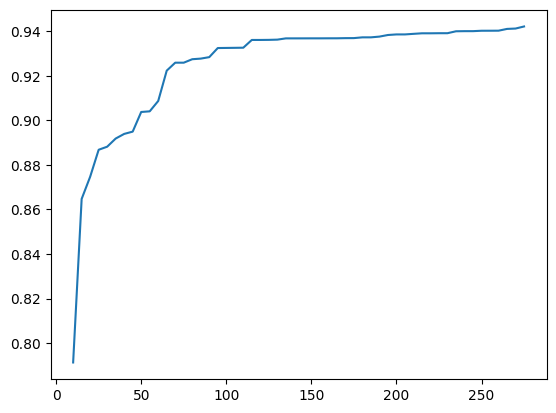

In [38]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

In [39]:
### K-Nesrest Neighbors

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [48]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
#train/ test split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression #classification
#Log = LogisticRegression()
#Log.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [61]:
#*****코드 잘 보기 *************
#k를 바꾼모델만들기 
##for문 안의 for문은 잘 안 씀 
#classssification_report -> 


#knn장점:간단, 이해 쉬움, 튜닝할 파라미터가 적음
#단점: 예측시간이 늘어남, 수백개의 데이터에서 좋은 성능을 기대하기 어려움 

from sklearn.neighbors import KNeighborsClassifier
for i in (1,3,5,7):
  for j in ('uniform', 'distance'):
    for k in ('auto', 'ball_tree', 'kd_tree', 'brute'):
        model = KNeighborsClassifier(n_neighbors= i, weights =j, algorithm= k)
        model.fit(X_train, y_train)
        y_p = model.predict(X_test)
        replation_ssquare = model.score(X_test, y_test)
        from sklearn.metrics import confusion_matrix, classification_report
        knn_matrix = confusion_matrix(y_test, y_p)
        print(knn_matrix)
        target_names = ['setosa', 'versssicolor', 'virginica']
        knn_result = classification_report(y_test, y_p, target_names=target_names)
        print(knn_result)
  print('\n')
print('\n')

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
versssicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
versssicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
versssicolor      

In [62]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))

accuracy : 1.00


In [63]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
print('accuracy : {:.2f}'.format(DT.score(X_test,y_test)))

accuracy : 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

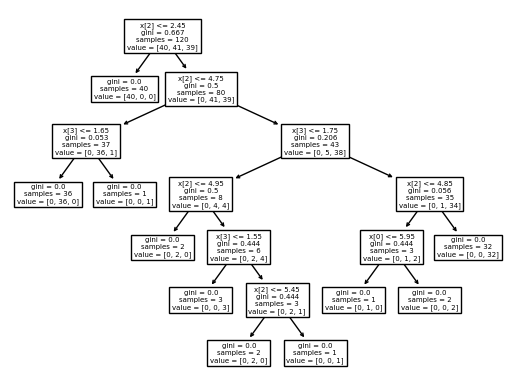

In [64]:
from sklearn import tree
tree.plot_tree(DT)

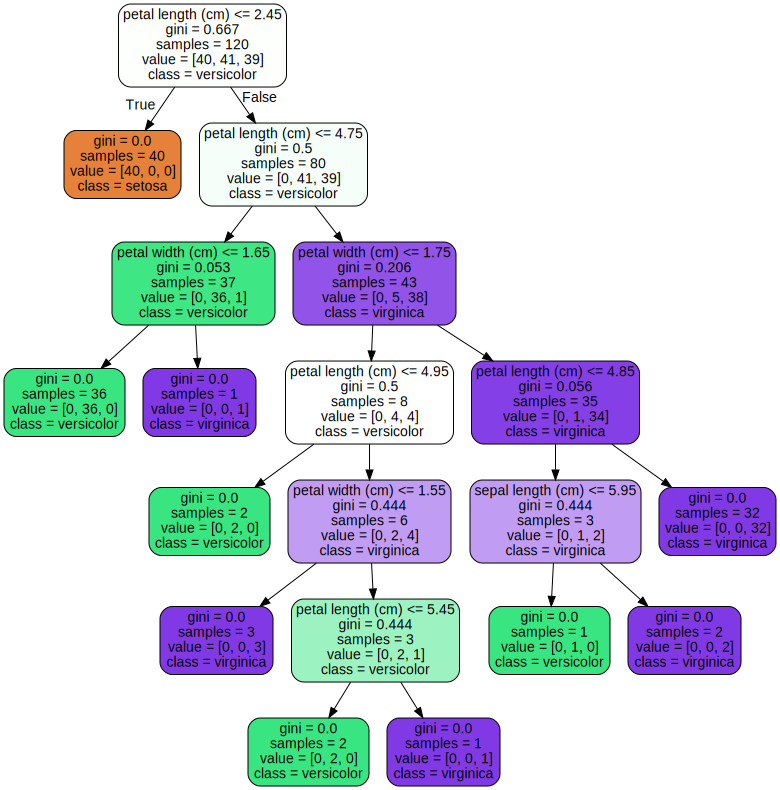

In [65]:
from sklearn.tree import export_graphviz
from graphviz import Source 
export_graphviz(DT, #모델
                out_file='iris_tree.dot', #저장경로 설정
                feature_names=iris.feature_names, #변수명
                class_names=iris.target_names, #종속변수
                rounded= True,
                filled=True)
Source.from_file('iris_tree.dot')




- 결론
  - KNN의 장단점 그리고 언제 활용을 해야하는지 다음과 같이 심플하게 정리해 보았습니다.

- 장점

  - 쉬운 모델, 쉬운 알고리즘과 이해 (입문자가 샘플데이터를 활용할 때 좋음)
  - 튜닝할 hyperparameter 스트레스가 없음
  - 초기 시도해보기 좋은 시작점이 되는 모델
- 단점

  - 샘플 데이터가 늘어나면 예측시간도 늘어나기 때문에 매우 느려짐
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움
  - feature가 많은(수 백개 이상) 데이터셋에서는 좋은 성능을 기대하기 어려움
  - feature의 값이 대부분 0인 데이터셋과는 매우 안좋은 성능을 냄
  - 결론, kaggle과 현업에서는 더 좋은 대안들이 많기 때문에 자주 쓰이는 알고리즘은 아닙니다. 하지만, 초기에 학습을 목표로 해볼 필요는 있습니다!

In [ ]:
## 결정 트리 모델의 시각화(Decision Tree Visualiozation)

In [66]:
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_leaf =6,random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(min_samples_leaf=6, random_state=156)

[Text(0.375, 0.9, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]'),
 Text(0.25, 0.5, 'x[2] <= 4.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.375, 0.3, 'gini = 0.245\nsamples = 7\nvalue = [0, 6, 1]'),
 Text(0.75, 0.5, 'x[2] <= 5.15\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]'),
 Text(0.625, 0.3, 'x[2] <= 4.95\ngini = 0.355\nsamples = 13\nvalue = [0, 3, 10]'),
 Text(0.5, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.75, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

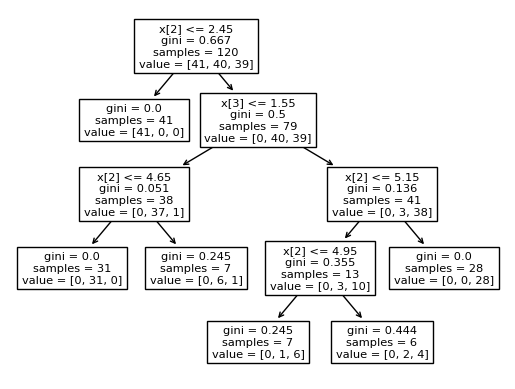

In [68]:
from sklearn import tree
tree.plot_tree(dt_clf)

In [69]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

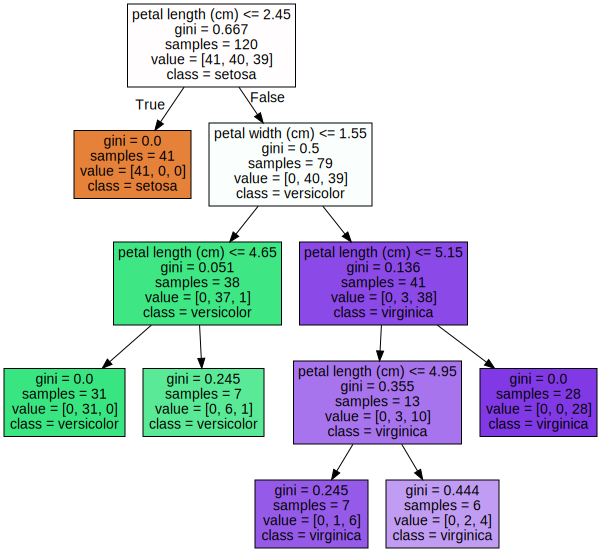

In [70]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.    0.    0.567 0.433]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.567
petal width (cm) : 0.433


<Axes: >

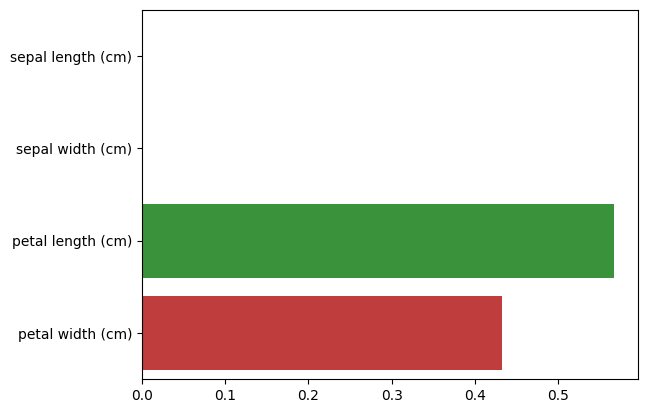

In [71]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

In [72]:
dt_clf.score(X_test,y_test)

0.8666666666666667

## 4013
# 분류 알고리즘


In [1]:
## Scikit-learn을 활용한 나이브 베이즈 분류기 구축


In [2]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.|
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [4]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
#Combinig weather and temp into single listof tuples
features = zip(weather_encoded,temp_encoded)
features = list(features)
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [6]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted) # 1: Yes

Predicted Value: [1]


아까 베이즈 정리를 활용하여 직접 계산했을 때, 날씨가 Overcast, 기온이 Mild일 때 play로 예측을 했습니다. sklearn의 naive_bayes에서도 동일한 결과가 나옵니다. 1이 Play를 한다입니다.

In [7]:
### Label이 여러개인 나이브 베이즈

In [8]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [9]:
wine.data.shape

(178, 13)

In [10]:
wine.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


나이브 베이즈의 장단점


- 장점

1. 간단하고, 빠르며, 정확한 모델입니다.

2. computation cost가 작습니다. (따라서 빠릅니다.)

3. 큰 데이터셋에 적합합니다.

4. 연속형보다 이산형 데이터에서 성능이 좋습니다.

5. Multiple class 예측을 위해서도 사용할 수 있습니다.

- 단점

 - feature 간의 독립성이 있어야 합니다. 하지만 실제 데이터에서 모든 feature가 독립인 경우는 드뭅니다. 장점이 많지만 feature가 서로 독립이어야 한다는 크리티컬한 단점이 있습니다.

 - feature간 독립성이 있다는 말은 feature간에 서로 상관관계가 없다는 뜻입니다. X1과 X2라는 feature가 있을 때 X1이 증가하면 X2도 같이 증가한다고 합시다. 그럼 X1과 X2는 서로 상관관계가 있다고 말할 수 있고, 이는 X1과 X2가 독립성이 없다는 뜻입니다. X1과 X2가 독립성이 있으려면 X1이 증가하든 말든, X2에는 아무런 영향을 미치지 않아야 합니다. 하지만 우리가 얻을 수 있는 데이터에서는 feature간의 독립성이 항상 보장되지는 않습니다. 나이브 베이즈 모델은 feature간 독립성이 있다는 가정하에 성립되는 모델이기 때문에 실생활에서 바로 적용하기는 어려움있습니다.

In [ ]:


 **결정트리와 앙상블**
 - 결정 트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하여, 이로 인한 과적합(Overfitting)이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있습니다.

 - 하지만 이러한 단점이 앙상블 기법에서는 오히려 장점으로 작용. 앙상블은 매우 많은 여러개의 약한 학습기(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데, 결정트리가 좋은 약한 학습기가 되기 때문(GBM, LightGBM etc)


# 결정트리(Dicision Tree)

- 일반적으로 쉽게 표현하는 방법은 if/else 로 스무고개 게임을 한다고 생각하면 된다.


- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다. 매, 펭귄, 돌고래, 곰을 구분한다고 생각해봅시다. 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매, 펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가 있나요?'라는 질문으로 나눌 수 있습니다. 

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwlH1u%2FbtqwWZI9Xen%2FkFJDjGSFJAPxhyatC3Xhs0%2Fimg.png' width=700 height=300>
</figure>

특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 함.

<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fdy5OwG%2FbtqDwdHofoT%2FNtDy9lqXkhWTRTwEz6txd0%2Fimg.png' width=700 height=300>
</figure>

많은 규칙이 있으면 분류를 결정하는 방식이 복잡해짐-> 과적합으로 이어지기 쉬움

**결론 :트리가 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음.** 
참고 : https://jaaamj.tistory.com/21



### 데이터의 균일도

<figure>
    <img src='https://blog.kakaocdn.net/dn/dhoo7N/btqDvzqEhPH/QdOsfkqc2hcwHISIh0peo1/img.png' width=700 height=300>
</figure>

참고 : https://jaaamj.tistory.com/21

위 그림에서는 C > B > A 순으로 균일도가 높다고 할 수 있습니다. C는 모두 파란색 공으로 데이터가 모두 균일한 상태입니다. B의 경우는 일부의 하얀색 공을 가지고 있지만 대부분 파란색 공으로 구성되어 있어 C다음으로 균일도가 높습니다


이러한 데이터 세트에서 균일도는 데이터를 구분하는데 있어서 필요한 정보의 양에 영향을 미치게 됩니다.

 

정보의 균일도를 측정하는 대표적인 방법에는 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니계수가 있습니다.

### 불순도(Impurity)


불순도(Impurity)란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻합니다. 아래 그림에서 위쪽 범주는 불순도가 낮고, 아래쪽 범주는 불순도가 높습니다. 바꾸어 말하면 위쪽 범주는 순도(Purity)가 높고, 아래쪽 범주는 순도가 낮습니다. 위쪽 범주는 다 빨간점인데 하나만 파란점이므로 불순도가 낮다고 할 수 있습니다. 반면 아래쪽 범주는 5개는 파란점, 3개는 빨간점으로 서로 다른 데이터가 많이 섞여 있어 불순도가 높습니다.


<figure>
    <img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png' width=400 height=300>
</figure>


출처: ratsgo's blog



한 범주에 하나의 데이터만 있다면 불순도가 최소(혹은 순도가 최대)이고, 한 범주 안에 서로 다른 두 데이터가 정확히 반반 있다면 불순도가 최대(혹은 순도가 최소)입니다. 결정 트리는 불순도를 최소화(혹은 순도를 최대화)하는 방향으로 학습을 진행합니다.

엔트로피(Entropy)는 불순도(Impurity)를 수치적으로 나타낸 척도입니다. 엔트로피가 높다는 것은 불순도가 높다는 뜻이고, 엔트로피가 낮다는 것은 불순도가 낮다는 뜻입니다. 엔트로피가 1이면 불순도가 최대입니다. 즉, 한 범주 안에 서로 다른 데이터가 정확히 반반 있다는 뜻입니다. 엔트로피가 0이면 불순도는 최소입니다. 한 범주 안에 하나의 데이터만 있다는 뜻입니다. 엔트로피를 구하는 공식은 아래와 같습니다

<figure>
<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FpL6pO%2FbtqwVDN1V94%2FTYgn5iFrPTfgdVwZhxVKl1%2Fimg.png' width=500 height=100>
</figure>

**Pi = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율**






#### 정보 이득(Information Gain)

정보 이득은 엔트로피라는 개념을 기반으로 함. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값. 즉, 1-엔트로피 지수. 결정트리는 이 정보 이득 지수로 분할 기준을 정함. 즉, 정보 이득이 높은 속성을 기준으로 분할


#### 지니 계수(Gini Index)

원래 결제학에서 불평등 지수를 나타낼 때 사용하는 계수. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등함. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석 되어, 계수가 낮은 속성을 기준으로 분할.

순도와 관련해 부연설명을 드리면 A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우(=불확실성 최소=순도 최대) 엔트로피는 0입니다. 반대로 범주가 둘뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우(=불확실성 최대=순도 최소) 엔트로피는 1의 값을 갖습니다. 엔트로피 외에 불순도 지표로 많이 쓰이는 지니계수(Gini Index) 공식은 아래와 같습니다.


<figure>
<img src='https://qph.fs.quoracdn.net/main-qimg-690a5cee77c5927cade25f26d1e53e77' width=500 height=500>
</figure>



아래는 범주가 두 개일 때 한쪽 범주에 속한 비율(p)에 따른 불순도의 변화량을 그래프로 나타낸 것입니다. 보시다시피 그 비율이 0.5(두 범주가 각각 반반씩 섞여 있는 경우)일 때 불순도가 최대임을 알 수가 있습니다. 오분류오차(misclassification error)는 따로 설명드리지 않은 지표인데요, 오분류오차는 엔트로피나 지니계수와 더불어 불순도를 측정할 수 있긴 하나 나머지 두 지표와 달리 미분이 불가능한 점 때문에 자주 쓰이지는 않는다고 합니다.


<figure>
<img src='http://i.imgur.com/n3MVwHW.png' width=500 height=500>
</figure>



참고 : ratgo's blog




#####  결정트리 주요 hyperparameter

1. max_depth
 - 트리의 최대 깊이를 규정
 - defualt 는 None.None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 게속 깊이를 증가시킴.
 - 깊이가 깊어지면, min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

2. max_features
 - 최적의 분할을 위해 고려할 최대 피쳐 개수, 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행.
 - int 형으로 지정하면 대상 피처의 개수, float 형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임.
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 ${\sqrt {전체 피처}}$개수 만큼 선정.
 - 'auto'로 지정하면 sqrt와 동일
 - 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정

3. min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨.
 - 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어, 1로 설정하는 경우 분할되는 노드가 많아져서 과적합 가능성 증가
4. min_samples_leaf
 - 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
 - min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 클래스의 데이터가 극도로 작을 수 있으므로, 이 경우는 작게 설정 필요.

5. max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수.


**결정트리를 그리가 위해 graphviz를 이용함**



설치 참고 : https://wiznxt.tistory.com/776

In [12]:
# 결정트리를 그리기 위해 praphviz를 사용함
! pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 예제) 학습데이터는 다음과 같다.

참고 : https://blog.daum.net/geoscience/1312

In [15]:
# 데이터 정의
data = pd.DataFrame({"no_insects":["True","True","True","False","True","True","True","True","True","False"],
                     "no_dead":["True","True","False","True","True","True","False","False","True","False"],
                     "no_wilting":["True","True","True","True","True","True","False","True","True","True"],
                     "no_diseases":["True","True","False","True","True","True","False","False","True","True"],
                     "tree_health":["Good","Good","Poor","Good","Good","Good","Poor","Poor","Good","Poor"]}, 
                    columns=["no_insects","no_dead","no_wilting","no_diseases","tree_health"])
# 기술 속성(descriptive features)
features = data[["no_insects","no_dead","no_wilting","no_diseases"]]
# 대상 속성(target feature)
target = data["tree_health"]
print(data)

  no_insects no_dead no_wilting no_diseases tree_health
0       True    True       True        True        Good
1       True    True       True        True        Good
2       True   False       True       False        Poor
3      False    True       True        True        Good
4       True    True       True        True        Good
5       True    True       True        True        Good
6       True   False      False       False        Poor
7       True   False       True       False        Poor
8       True    True       True        True        Good
9      False   False       True        True        Poor


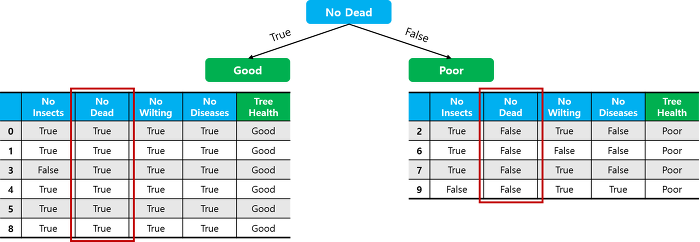
ㅠ

 - 유방암 데이터 활용

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [17]:
type(cancer)

sklearn.utils._bunch.Bunch

In [18]:
dir(cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [19]:
cancer.data.shape

(569, 30)

In [20]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [23]:
np.bincount(cancer.target)

array([212, 357])

In [24]:
print((cancer.DESCR))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
for i, name in enumerate(cancer.feature_names):
  print('%02d: %s' %(i, name))

00: mean radius
01: mean texture
02: mean perimeter
03: mean area
04: mean smoothness
05: mean compactness
06: mean concavity
07: mean concave points
08: mean symmetry
09: mean fractal dimension
10: radius error
11: texture error
12: perimeter error
13: area error
14: smoothness error
15: compactness error
16: concavity error
17: concave points error
18: symmetry error
19: fractal dimension error
20: worst radius
21: worst texture
22: worst perimeter
23: worst area
24: worst smoothness
25: worst compactness
26: worst concavity
27: worst concave points
28: worst symmetry
29: worst fractal dimension


In [29]:
malignant = cancer.data[cancer.target==0]
benigh = cancer.data[cancer.target==1]

In [31]:
_, bins = np.histogram(cancer.data[:,0], bins = 20)
np.histogram(cancer.data[:, 0], bins=20)

(array([ 4, 15, 31, 48, 93, 92, 71, 58, 32, 23, 22, 28, 27, 11,  2,  5,  2,
         2,  0,  3]),
 array([ 6.981  ,  8.03745,  9.0939 , 10.15035, 11.2068 , 12.26325,
        13.3197 , 14.37615, 15.4326 , 16.48905, 17.5455 , 18.60195,
        19.6584 , 20.71485, 21.7713 , 22.82775, 23.8842 , 24.94065,
        25.9971 , 27.05355, 28.11   ]))